In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:

import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from cesium import datasets
from cesium import featurize as ft

import scipy
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
ap = pd.read_csv("../data/AirPassengers.csv", header=None)
ap

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [44]:
ap.columns = ['Date','Passengers']

In [ ]:

# Split the index into 'Year' and 'Month' columns
ap[['Year', 'Month']] = ap.index.str.split('-', expand=True)

# Reset the index
ap.reset_index(inplace=True)

# Display the DataFrame
print(ap)

In [47]:
ap[['Year', 'Month']] = ap['Date'].str.split('-', expand=True)

In [48]:
ap

,Date,Passengers,Year,Month
0,1949-01,112,1949,01
1,1949-02,118,1949,02
2,1949-03,132,1949,03
3,1949-04,129,1949,04
4,1949-05,121,1949,05
...,...,...,...,...
139,1960-08,606,1960,08
140,1960-09,508,1960,09
141,1960-10,461,1960,10
142,1960-11,390,1960,11


In [71]:

year_data = ap[ap['Year']=='1949']
year_data

,Date,Passengers,Year,Month
0,1949-01,112,1949,01
1,1949-02,118,1949,02
2,1949-03,132,1949,03
3,1949-04,129,1949,04
4,1949-05,121,1949,05
5,1949-06,135,1949,06
6,1949-07,148,1949,07
7,1949-08,148,1949,08
8,1949-09,136,1949,09
9,1949-10,119,1949,10


In [82]:
years = set(ap['Year'])
years

{'1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960'}

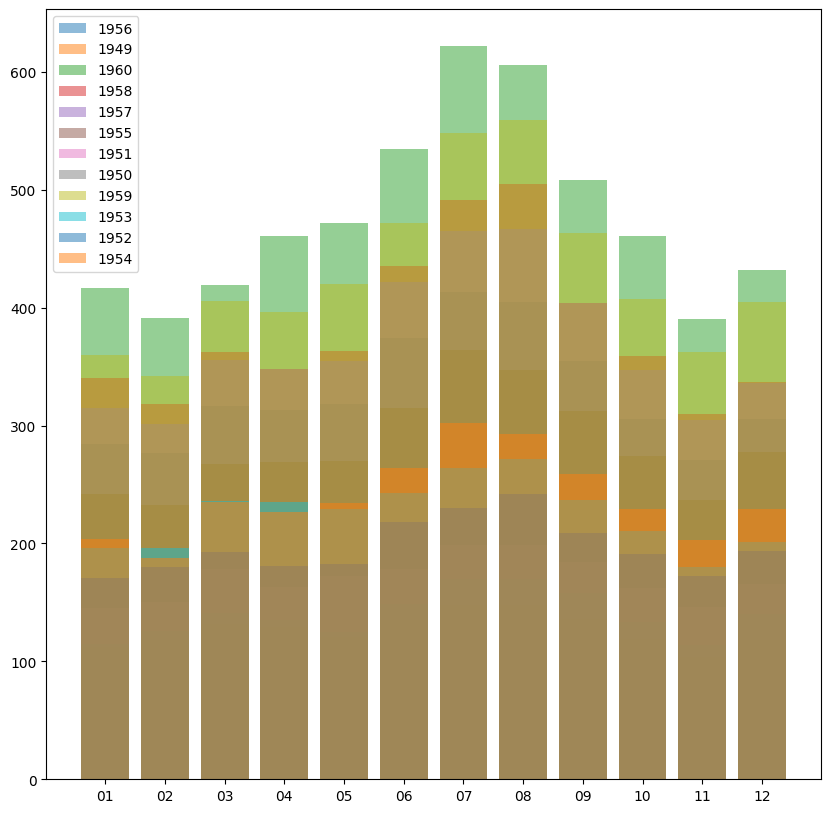

In [80]:
# plt.plot(ap['Month'],ap['Passengers'],'o')

# plt.bar(year_data['Month'], year_data['Passengers'])
plt.figure(figsize=(10, 10))
years = set(ap['Year'])
for year in years:
    plt.bar(ap[ap['Year']==year]['Month'], ap[ap['Year']==year]['Passengers'],alpha=0.5,  label=year)

plt.legend()
plt.show()
# plt.scatter(ap['Month'],ap['Passengers'])
# plt.plot(np.diff(np.log(ap.values[:, 0])))

## Training the Trend in a Machine Learning Model

In [171]:
# from sklearn.models import LinearRegression, MultiOutputRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor




In [157]:
# input selection
X = ap[['Month', 'Year']]
# X = ap
print(X)

# output selection
y = ap['Passengers']
print(y)

    Month  Year
0      01  1949
1      02  1949
2      03  1949
3      04  1949
4      05  1949
..    ...   ...
139    08  1960
140    09  1960
141    10  1960
142    11  1960
143    12  1960

[144 rows x 2 columns]
0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64


In [159]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
y_train

124    420
31     199
98     356
36     171
16     125
      ... 
71     229
106    305
14     141
92     355
102    465
Name: Passengers, Length: 115, dtype: int64

### Linear Regression

In [178]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinPreds = LinReg.predict(X_test)
LinScore = LinReg.score(X_test, y_test)
print(f" Regression Score: {LinScore}")

 Regression Score: 0.8425687950545342


### LOgistic Regression

In [182]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000 )
LogReg.fit(X_train, y_train)
LogPreds = LogReg.predict(X_test)
LogScore = LogReg.score(X_test, y_test)
print(f" Regression Score: {LogScore}")

 Regression Score: 0.0


### Random Forest Regression

In [173]:
RF = RandomForestRegressor(n_estimators=20000, max_depth = 4, n_jobs=-1)
RF.fit(X_train, y_train)
RFPreds = RF.predict(X_test)
RFScore = RF.score(X_test, y_test)
print(f" Random Forest Score: {RFScore}")

In [175]:
RFScore = RF.score(X_test, y_test)
print(f" Random Forest Score: {RFScore}")

 Random Forest Score: 0.9144816516127701


In [177]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
DTScore = DT.score(X_test, y_test)
print(f" Decision Tree Score: {DTScore}")


 Decision Tree Score: 0.0


In [167]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),    
    'Random Forest': RandomForestRegressor(n_estimators=20000, max_depth = 4, n_jobs=-1)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

Linear Regression Accuracy: 0.8426
Decision Tree Accuracy: 0.0000
Random Forest Accuracy: 0.0000


## Exercise: now that we have 1 time series, how can we convert it to many samples?

In [185]:

ap = pd.read_csv("../data/AirPassengers.csv", parse_dates=[0])

ts = np.diff(np.log(ap.values[:, 0]))

NSTEPS = 12
ts.shape
vals = np.hstack([np.expand_dims(np.array(ts, dtype = np.float32), axis = 1) for _ in range(NSTEPS )])
ts[0:NSTEPS]
vals.shape
nrow = vals.shape[0]
for lag in range(1, vals.shape[1]):
    vals[:(nrow - lag),lag] = vals[lag:,lag]
    vals[(nrow - lag):, lag] = np.nan
vals
vals = vals[:(vals.shape[0] - NSTEPS + 1), :]
vals.shape
vals[-1]
ts[-NSTEPS:]
vals.shape


TypeError: loop of ufunc does not support argument 0 of type Timestamp which has no callable log method

In [189]:
ap = pd.read_csv("../data/AirPassengers.csv", header=None)
ap.columns = ['Date','Passengers']

# Split the index into 'Year' and 'Month' columns
ap[['Year', 'Month']] = ap.index.str.split('-', expand=True)

# Reset the index
ap.reset_index(inplace=True)

# Display the DataFrame
print(ap)
ap[['Year', 'Month']] = ap['Date'].str.split('-', expand=True)

AttributeError: Can only use .str accessor with string values!

In [ ]:
## Exercise: now that we have the time series broken down into a set of samples, how to featurize?
measures = [vals[i][0:(NSTEPS - 1)] for i in range(vals.shape[0])]
times = [[j for j in range(NSTEPS - 1)] for i in range(vals.shape[0])]
measures[0]
len(measures[0])

features_to_use = [
                   "amplitude",
                   "percent_beyond_1_std",
                   "skew",
                   "max_slope",
                   "percent_amplitude"]
fset_ap = ft.featurize_time_series(times=times,
                                    values=measures,
                                    errors=None,
                                    features_to_use=features_to_use,
                                    scheduler = None)
fset_ap.columns = fset_ap.columns.droplevel(-1)
fset_ap.head()
plt.hist(fset_ap.amplitude)
plt.hist(fset_ap.percent_amplitude)
plt.hist(fset_ap['skew'])

In [ ]:
## Exercise: can you fit an XGBRegressor to this problem? Let's use the first 100 'time series' as the training data
outcomes = vals[:, -1]
X_train, y_train = fset_ap.iloc[:100, :], outcomes[:100]
X_test, y_test   = fset_ap.iloc[100:, :], outcomes[100:]
X_train.shape
model = xgb.XGBRegressor(n_estimators=20, max_depth=2,
                              random_state=21)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

In [ ]:
### RMSE can be hard to digest .... How does the model perform?
plt.scatter(model.predict(X_test), y_test)
plt.scatter(model.predict(X_train), y_train)
pearsonr(model.predict(X_train), y_train)
pearsonr(model.predict(X_test), y_test)
xgb.plot_importance(model)

In [ ]:
### What went wrong? Let's revisit the feature set
fset_ap.head()
plt.plot(vals[0])
plt.plot(vals[1])
plt.plot(vals[2])

In [ ]:
## We need to find a way to generate features that encode positional information
### now we will generate our own features
vals.shape
feats = np.zeros( (vals.shape[0], 6), dtype = np.float32)
for i in range(vals.shape[0]):
    feats[i, 0] = np.where(vals[i] == np.max(vals[i]))[0][0]
    feats[i, 1] = np.where(vals[i] == np.min(vals[i]))[0][0]
    feats[i, 2] = feats[i, 0] - feats[i, 1]
    feats[i, 3] = np.max(vals[i][-3:])
    feats[i, 4] = vals[i][-1] - vals[i][-2]
    feats[i, 5] = vals[i][-1] - vals[i][-3]
feats[0:3]

In [184]:
### How do these look compared to the first set of features?
pd.DataFrame(feats[0:3])
X_train, y_train = feats[:100, :], outcomes[:100]
X_test, y_test   = feats[100:, :], outcomes[100:]
model = xgb.XGBRegressor(n_estimators=20, max_depth=2,
                              random_state=21)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)
plt.scatter(model.predict(X_test), y_test)
print(pearsonr(model.predict(X_test), y_test))
print(spearmanr(model.predict(X_test), y_test))
plt.scatter(model.predict(X_train), y_train)
print(pearsonr(model.predict(X_train), y_train))
print(spearmanr(model.predict(X_train), y_train))

TypeError: loop of ufunc does not support argument 0 of type Timestamp which has no callable log method